<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/Data_201_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("archive.zip")

In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.dropna(subset=['duration', 'release_year', 'title'], inplace = True)

I wanted to drop any rows that included NA's or any missing values in the columns of duration, release_year and title

In [6]:
df = df[df['type'] == 'Movie']
df['duration'] = df['duration'].str.replace(' min', '').astype(int)


<ipython-input-6-d0068d9f8a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].str.replace(' min', '').astype(int)


I wanted to convert the duration column to replace the word min with nothing to only show the number value for instance instead of 90 min it would just say 90.

In [7]:
df[['type', 'title', 'rating', 'duration','country', 'director', 'release_year']]

,type,title,rating,duration,country,director,release_year
0,Movie,Dick Johnson Is Dead,PG-13,90,United States,Kirsten Johnson,2020
6,Movie,My Little Pony: A New Generation,PG,91,NaN,"Robert Cullen, José Luis Ucha",2021
7,Movie,Sankofa,TV-MA,125,"United States, Ghana, Burkina Faso, United Kin...",Haile Gerima,1993
9,Movie,The Starling,PG-13,104,United States,Theodore Melfi,2021
12,Movie,Je Suis Karl,TV-MA,127,"Germany, Czech Republic",Christian Schwochow,2021
...,...,...,...,...,...,...,...
8801,Movie,Zinzana,TV-MA,96,"United Arab Emirates, Jordan",Majid Al Ansari,2015
8802,Movie,Zodiac,R,158,United States,David Fincher,2007
8804,Movie,Zombieland,R,88,United States,Ruben Fleischer,2009
8805,Movie,Zoom,PG,88,United States,Peter Hewitt,2006


I wanted the dataset to only include the above columns

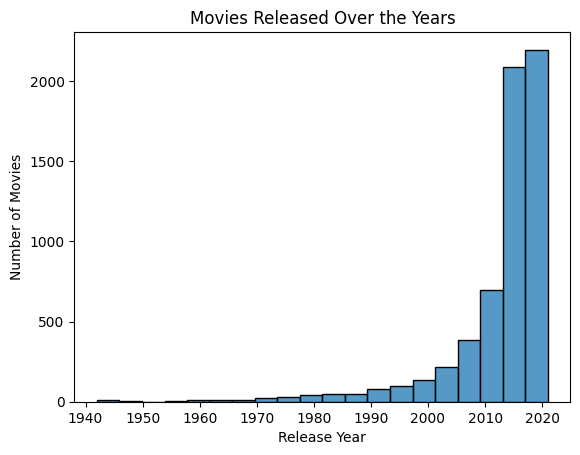

In [8]:
sns.histplot(data = df, x = 'release_year', bins = 20, kde = False)
sns.set_context("notebook")
plt.title('Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

This histogram is highlighting the increase in movies released over approximately the last 80 years

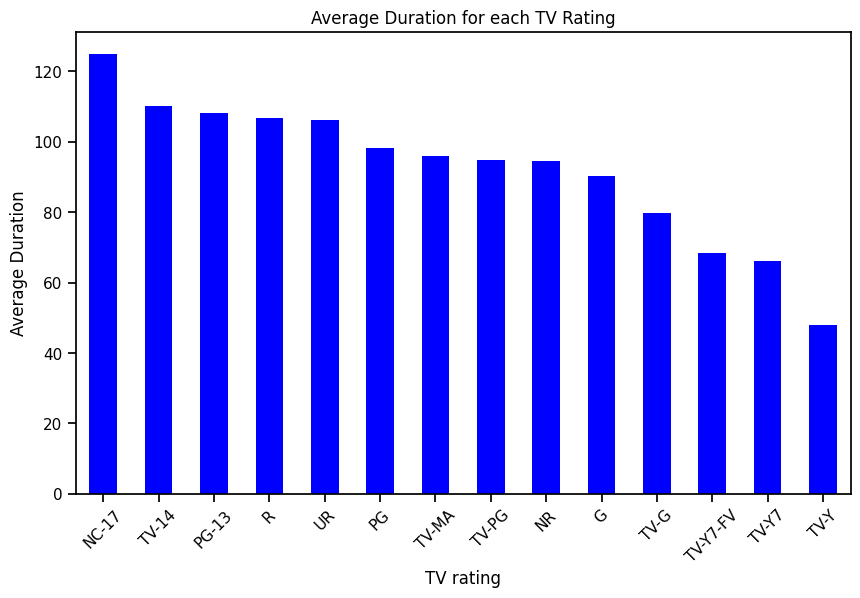

In [17]:
plt.figure(figsize = (10,6))
avg_duration = df.groupby('rating')['duration'].mean().sort_values(ascending = False)
avg_duration.plot(kind = 'bar', color = 'blue')
plt.title("Average Duration for each TV Rating")
plt.xlabel("TV rating")
plt.ylabel("Average Duration")
plt.xticks(rotation = 45)
plt.show()

This bar chart shows the descending order of average duration of each type of film in minutes

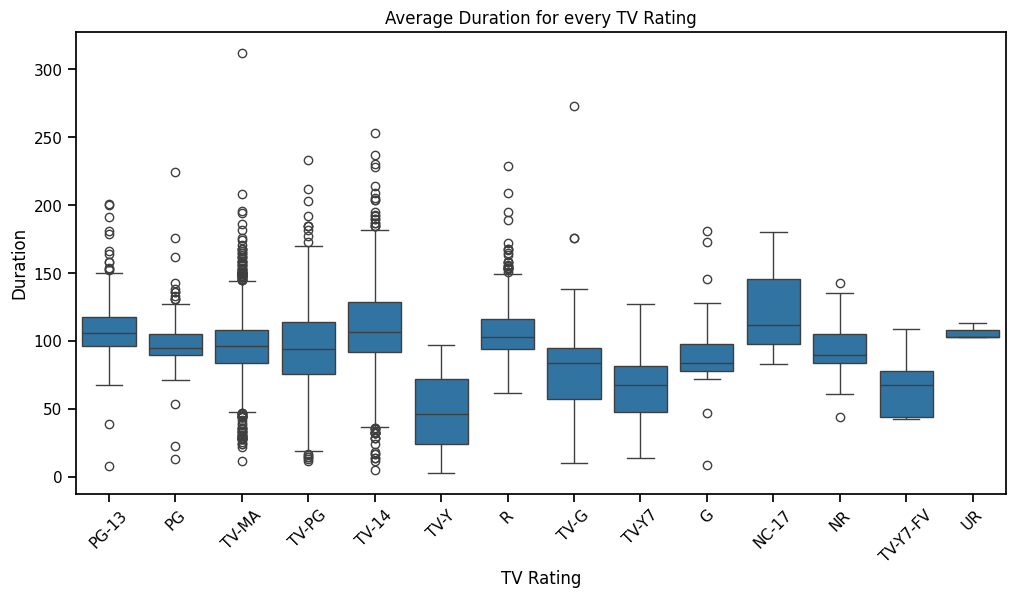

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = 'rating', y = 'duration')
plt.title("Average Duration for every TV Rating")
plt.xlabel("TV Rating")
plt.ylabel("Duration")
plt.xticks(rotation = 45)
plt.show()

This boxplot is showing the range of duration time of every tv rating

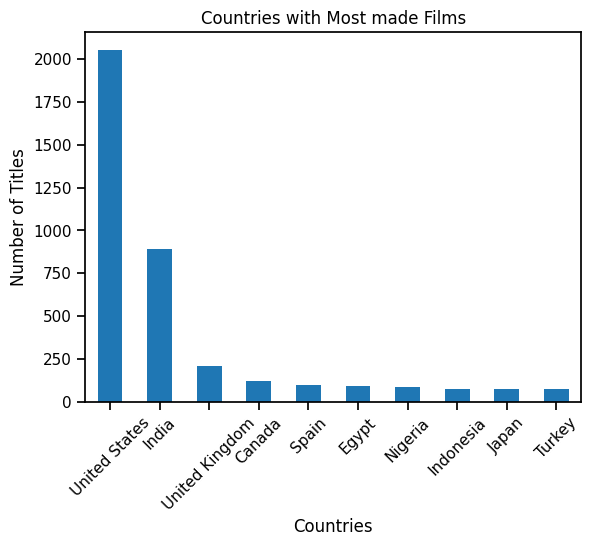

In [11]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind = 'bar')
plt.title("Countries with Most made Films")
plt.xlabel("Countries")
plt.ylabel("Number of Titles")
plt.xticks(rotation = 45)
plt.show()

This barchart is showing the number of realeased films for the top 10 countries




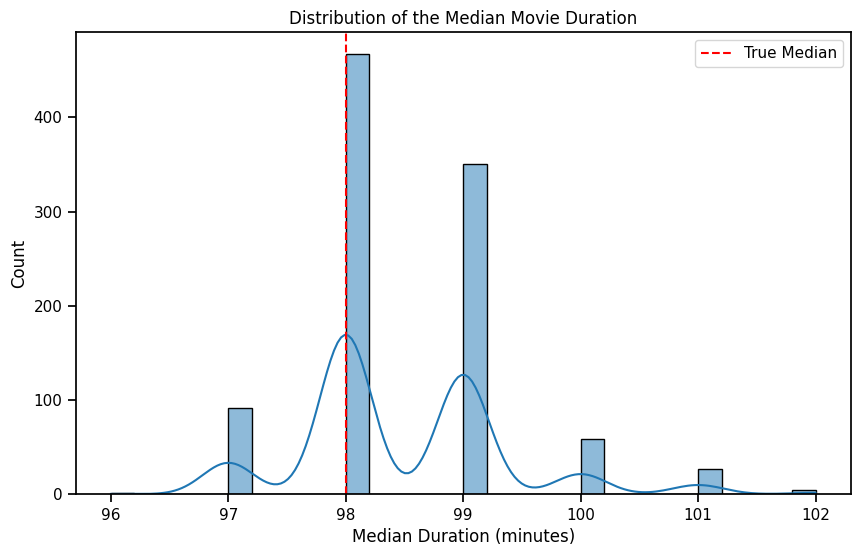

In [12]:
sample_df = df.sample(frac=0.10, random_state=42)
sample_medians = []

for i in range(1000):
    sample = sample_df['duration'].sample(frac=1, replace=True)
    sample_medians.append(np.median(sample))

plt.figure(figsize=(10, 6))
sns.histplot(sample_medians, kde=True)
plt.axvline(np.median(df['duration']), color='red', linestyle='--', label='True Median')
plt.title('Distribution of the Median Movie Duration')
plt.xlabel('Median Duration (minutes)')
plt.legend()
plt.show()


This code uses bootstrap sampling to estimate the distribution of the median movie duration. It draws 1,000 resamples from 10% of the original data and visualizes the distribution compared to the true median.